# Introduction
This is my first project which is real life problem. I am going to learn Data Science and ML algorithms on this project's path. 

<font color = 'red'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)    
1. [Outlier Detection](#7)   
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Matrices Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
    * [Between Sibsp -- Survived](#13)
    * [Between Parch -- Survived](#14)
    * [Between PClass -- Survived](#15)
    * [Between Age -- Survived](#16)
    * [Between Pclass -- Age -- Survived](#17)
    * [Between Embarked -- Sex -- Pclass -- Survived](#18)
    * [Between Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing : Age Feature](#20)

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns
from collections import Counter

import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [31]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
tset_PassengerId = test_df["PassengerId"]

In [32]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<a id = "2"></a><br>
# Variable Description
1. PassengerId : unique Passenger number
1. Survived : Passenger survive(1) or Died (0)
1. Pclass : Passenger class
1. Name : Name
1. Sex : Sex
1. Age : Age of Passenger
1. SibSp : number of siblins / spouses
1. Parch : number of Parents/Children
1. Ticket : Ticket number
1. Fare : Cost of Ticket
1. Cabin : Cabin name
1. Embarked : port of where passenger embarked

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare ve Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): Cabin, embarked, ticket, name and sex

<a id = "3"></a><br>
# Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and passengerId

<a id = "4"></a><br>
## Categorical Variable

In [35]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    
    var = train_df[variable]            # get feature
   
    varValue = var.value_counts()       # count number of categorical variable(value/sample)
    
    #visualize
    
    plt.figure(figsize = (10,5))
    plt.bar(varValue.index , varValue)
    plt.xticks(varValue.index , varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} : \n {}".format(variable,varValue))
    
    

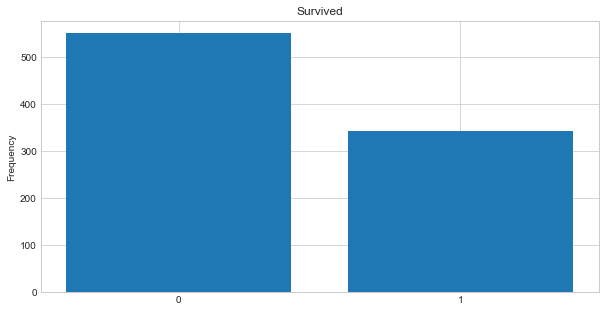

Survived : 
 0    549
1    342
Name: Survived, dtype: int64


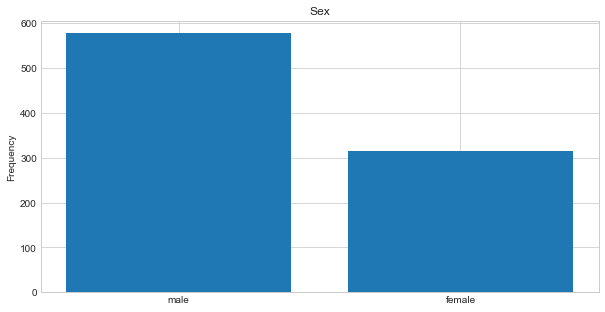

Sex : 
 male      577
female    314
Name: Sex, dtype: int64


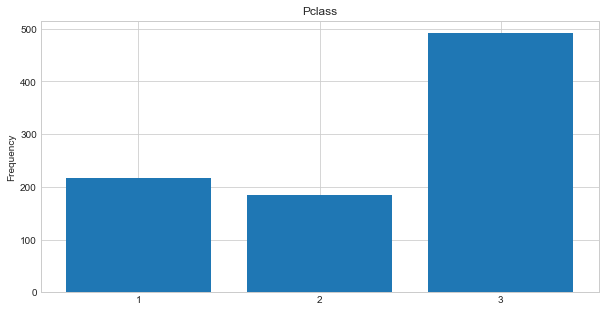

Pclass : 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


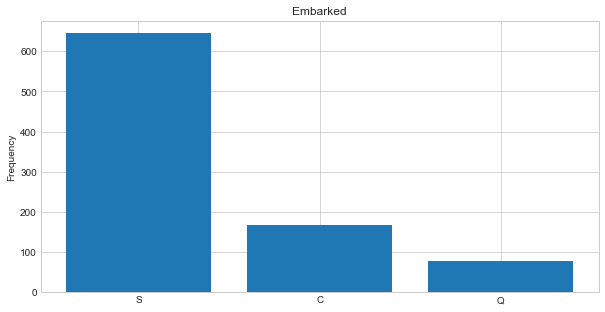

Embarked : 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


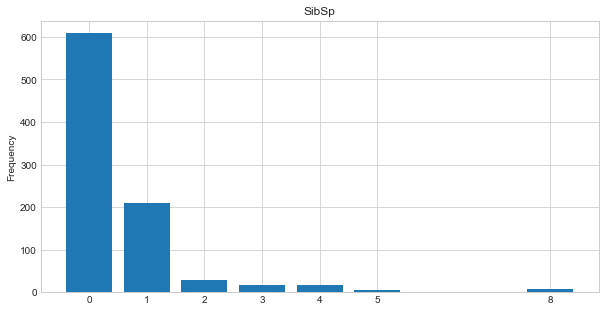

SibSp : 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


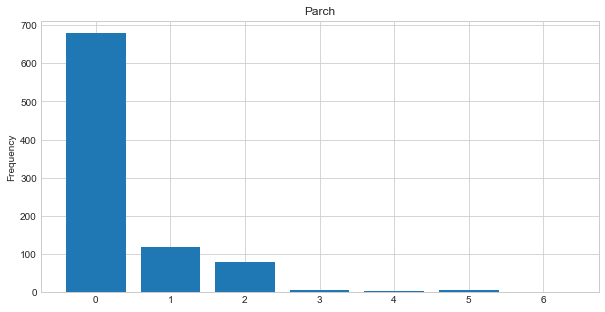

Parch : 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [36]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

<a id = "5"></a><br>
## Numerical Variable

In [37]:
def numVar_hist(variable):
    plt.figure(figsize = (10,5))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} dist. with histogram".format(variable))
    plt.show()
    
    

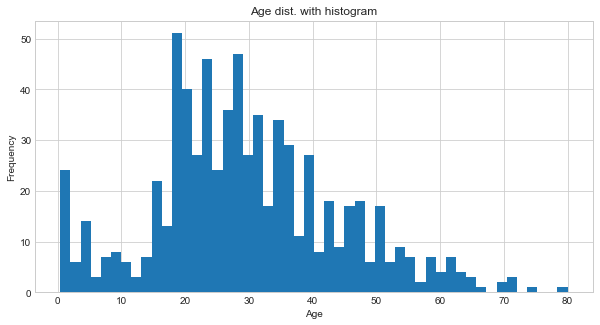

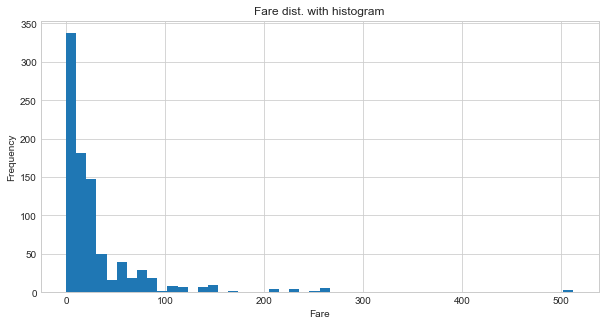

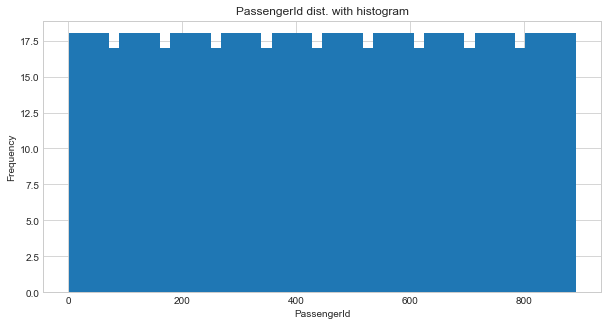

In [38]:
num_var = ["Age","Fare","PassengerId"]
for n in num_var:
    numVar_hist(n)

<a id = "6"></a><br>
# Basic Data Analysis
* PClass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [39]:
# PClass - Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending = False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [40]:
# Sex - Survived
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [41]:
# SibSp - Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [42]:
# Parch - Survived
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id = "7"></a><br>
# Outlier Detection

In [43]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [44]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [45]:
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop = True)

<a id = "8"></a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [46]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [47]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id = "9"></a><br>
# Find Missing Value

In [48]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [49]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id = "10"></a><br>
# Fill Missing Value

In [50]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


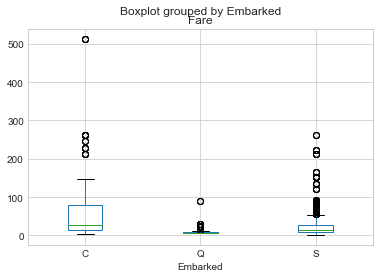

In [51]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [52]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [53]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [54]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [55]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "11"></a><br>
# **Visualization**

<a id = "12"></a><br>
## Correlation Matrices Between SibSp -- Parch -- Age -- Fare -- Survived

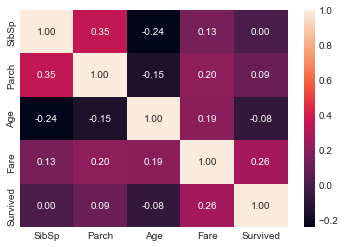

In [56]:
list1 = ["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df[list1].corr() , annot=True , fmt=".2f" )
plt.show()

 !! Fare feature seems to has a correlation bewteen Survived 

In [57]:
import plotly.graph_objs as go
data =go.Scatter(
                    y = train_df.Fare,
                    x =  train_df.Age,
                    mode = "markers",
                    name = "Fare-Age",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= train_df.Fare.corr(train_df.Age))

layout = dict(title = 'Correlation of Fare and Age',
              yaxis= dict(title= 'Fare',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'Age',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<a id = "13"></a><br>
##  Between SibSp -- Survived

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



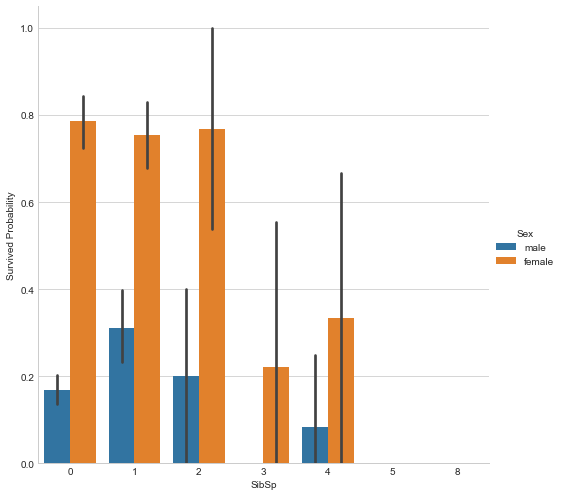

In [58]:
a = sns.factorplot(x = "SibSp" , y = "Survived",hue = "Sex", data = train_df , kind = "bar" , size = 7)
a.set_ylabels("Survived Probability")
plt.show(a)

* Number of SibSp has negative correlation between Survived.
* More SibSp is less Survived
* If number of SibSp == 0 or 1 or 2 , passenger has more chance to survive

<a id = "14"></a><br>
##  Between Parch -- Survived

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



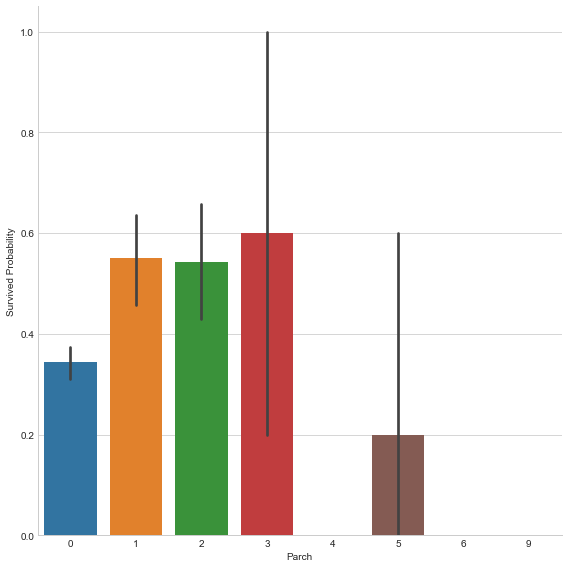

In [59]:
a = sns.factorplot(x = "Parch", y = "Survived", data = train_df ,kind = "bar" ,size = 8 )
a.set_ylabels("Survived Probability")
plt.show(a)

* SibSp and Parch can be used for new feature
* Small families are has more chance to survive


<a id = "15"></a><br>
## Between PClass -- Survived

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



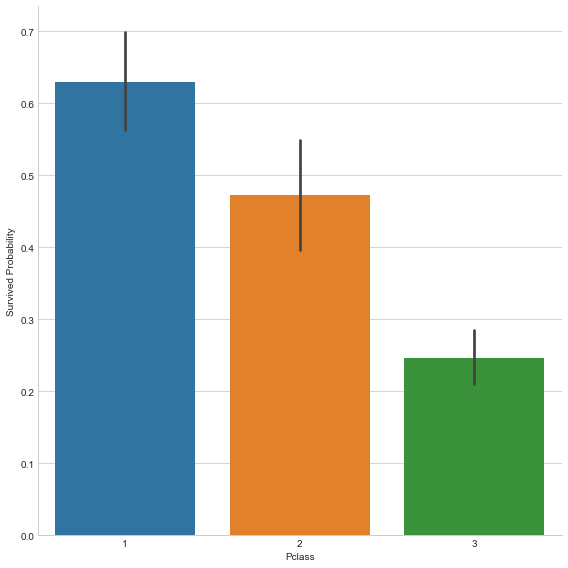

In [60]:
a = sns.factorplot(x = "Pclass", y = "Survived", data = train_df ,kind = "bar" ,size = 8 )
a.set_ylabels("Survived Probability")
plt.show(a)

<a id = "16"></a><br>
## Between Age -- Survived

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



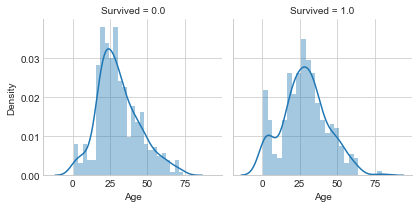

In [61]:
k = sns.FacetGrid(train_df , col="Survived")
k.map(sns.distplot , "Age" , bins = 25)
plt.show()

* Childres ( 10 <= ) has more chance of Survive
* Large number of Young people ( about 20 ) did not survive
* Most of passengers are 15-35 

<a id = "17"></a><br>
## Between PClass -- Age -- Survived

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



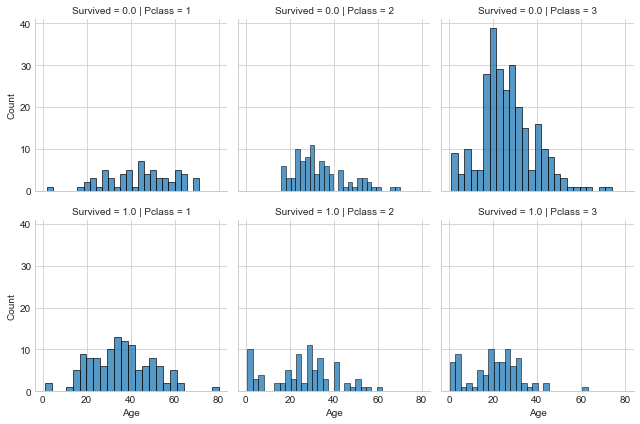

In [62]:
a = sns.FacetGrid(train_df , col="Pclass" , row="Survived", size=3)
a.map(sns.histplot , "Age" , bins = 25)
plt.show()

* Class type is important feature for Surviving

<a id = "18"></a><br>
## Between Embarked -- Sex -- Pclass -- Survived

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the pointplot function without specifying `order` is likely to produce an incorrect plot.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning:

Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.



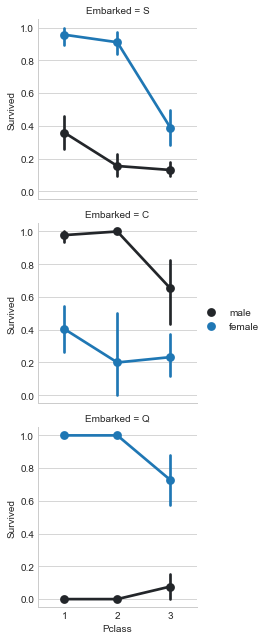

In [63]:
a = sns.FacetGrid(train_df , row = "Embarked" , size=3)
a.map(sns.pointplot , "Pclass","Survived","Sex")
a.add_legend()
plt.show()

* Females have much more survive probability.

<a id = "19"></a><br>
## Between Embarked -- Sex -- Fare -- Survived

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



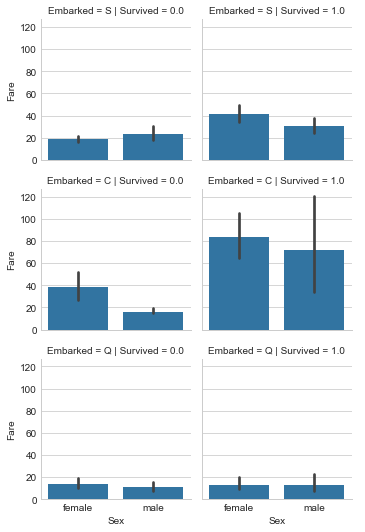

In [64]:
a = sns.FacetGrid(train_df , row = "Embarked" , col = "Survived" , size=2.5)
a.map(sns.barplot , "Sex","Fare")
a.add_legend()
plt.show()

* Much more Fare much more Surviving Probability

<a id = "20"></a><br>
## Fill Missing : Age Feature

In [65]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1007
Embarked          0
dtype: int64

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



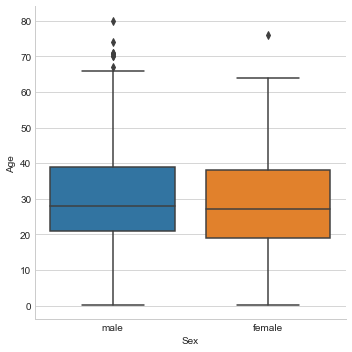

In [66]:
sns.factorplot(x = "Sex" , y = "Age" , data =train_df , kind = "box" )
plt.show()

* Medians of male and females are too close , so we can not predict correctly.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



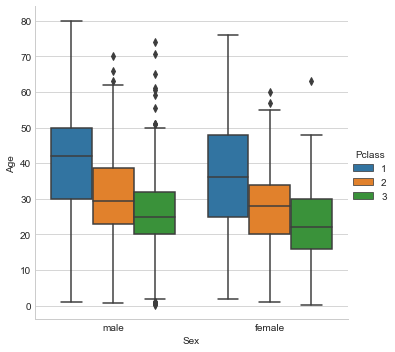

In [67]:
sns.factorplot(x = "Sex" , y = "Age"  ,hue = "Pclass" ,data =train_df , kind = "box" )
plt.show()

* oldest guys are in 1. class , youngest guys are in 3.rd class

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



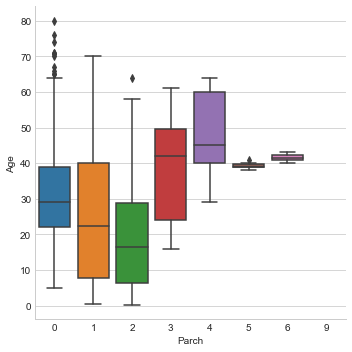

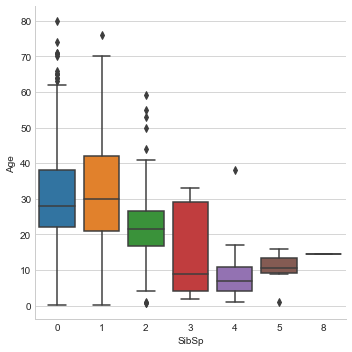

In [68]:
sns.factorplot(x = "Parch" , y = "Age" ,data =train_df , kind = "box" )
sns.factorplot(x = "SibSp" , y = "Age" ,data =train_df , kind = "box" )

plt.show()

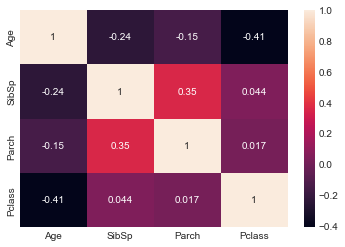

In [69]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr() , annot=True)
plt.show()

* Age is correlated with SibSp,Parch, and Pclass  but not with sex

In [70]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


[](http://)